In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
# Function to plot decision regions and test points
def plot_decision_regions(X_train, y_train, X_test, y_test, classifier, resolution=0.01):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v','*')
    colors = ('red', 'blue', 'lightgreen')
    cmap = plt.cm.RdYlBu
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    # Plot training samples
    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Train - {iris.target_names[cl]}', edgecolor='black')

    # Plot test samples with different markers
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx+3], label=f'Test - {iris.target_names[cl]}', edgecolor='black', s=100)


In [26]:
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the training data
train_predictions = rf_classifier.predict(X_train)

# Predict on the test data
test_predictions = rf_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9619047619047619
Test Accuracy: 0.7333333333333333


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
import numpy as np

# Example: Load a dataset (modify this part to use your own dataset)
data = load_iris()
X, y = data.data, data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 15, 20, None]  # Maximum depth of the tree
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Train the best model on the full training data
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Optionally: Evaluate on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))


Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.94
Test accuracy: 1.00


/var/folders/vq/wcv9l2jd4hd5287qdhm073800000gp/T/ipykernel_45579/1794957158.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_train[y_train == cl, 0], y=X_train[y_train == cl, 1],


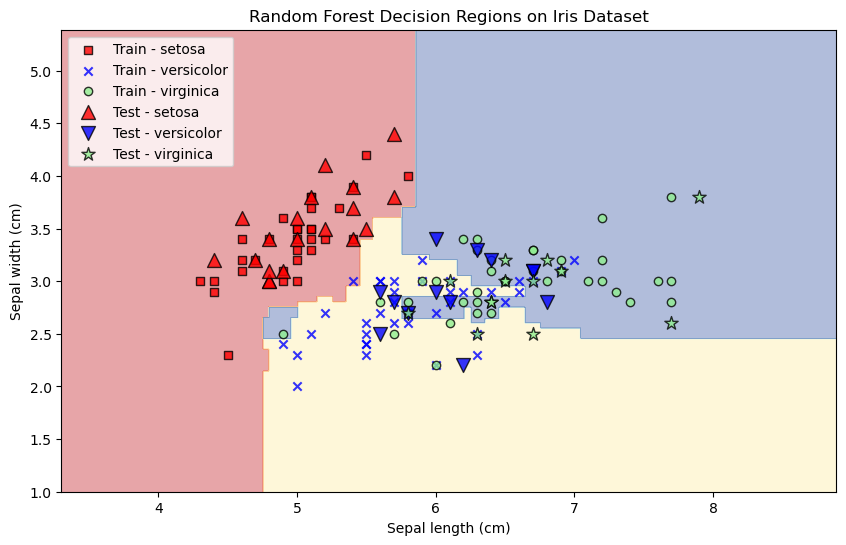

In [23]:
# Step 4: Visualization
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, X_test, y_test, classifier=rf_classifier)
plt.title('Random Forest Decision Regions on Iris Dataset')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left')
plt.show()


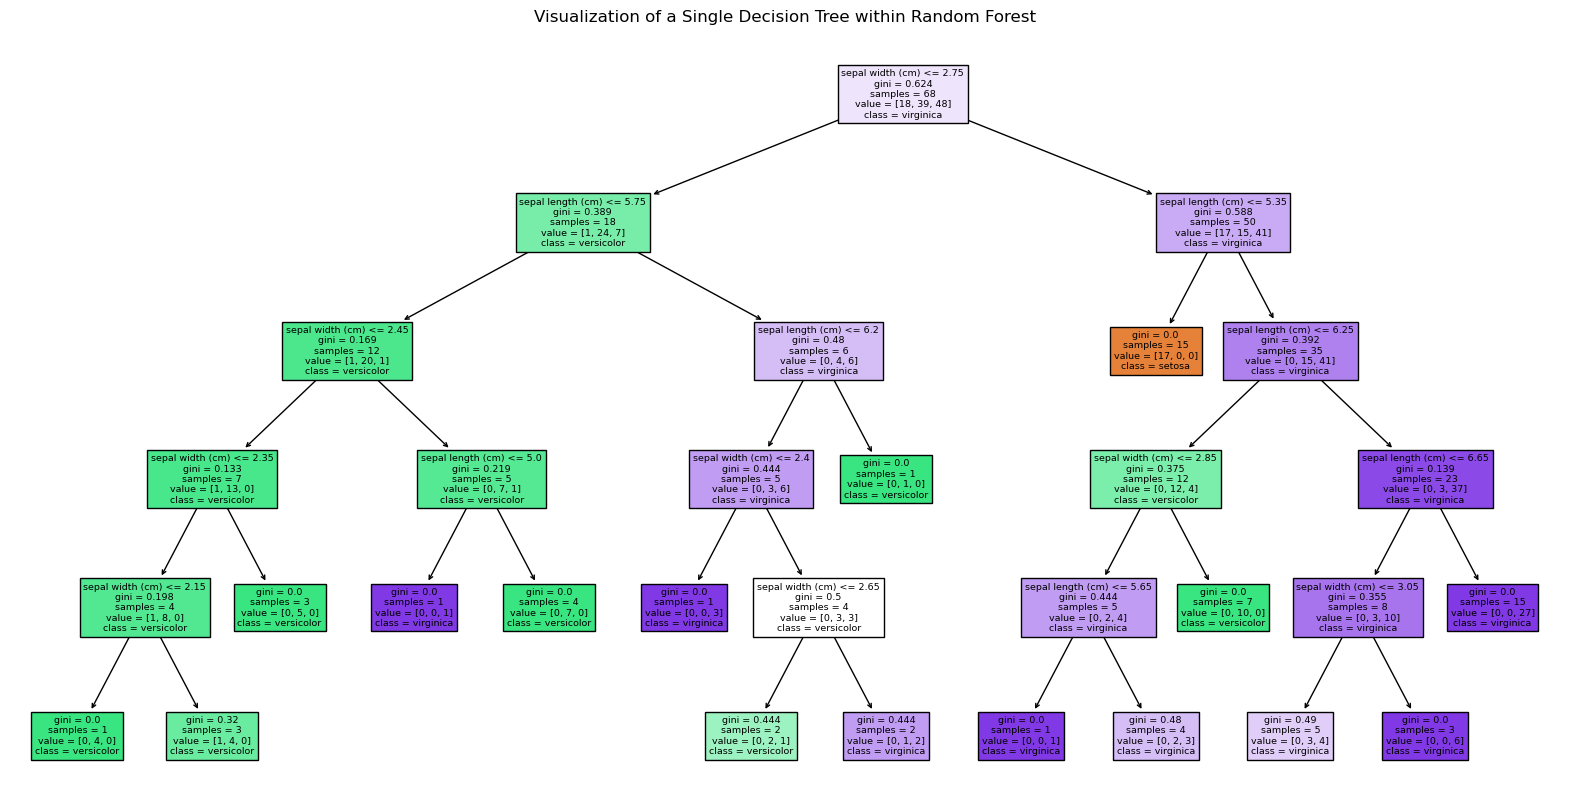

In [24]:
# Convert class names to list
class_names_list = iris.target_names.tolist()

# Choose one tree from the forest to visualize
chosen_tree = rf_classifier.estimators_[0]

# Plot the chosen tree
plt.figure(figsize=(20,10))
plot_tree(chosen_tree, filled=True, feature_names=iris.feature_names, class_names=class_names_list)
plt.title('Visualization of a Single Decision Tree within Random Forest')
plt.show()
